In [274]:
import pandas as pd
import numpy as np
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import GridSearchCV

from keras.models import Sequential
from keras.layers import Dense

#from tensorflow.keras.optimizers import Adam
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import cross_val_score


In [263]:
test_size=0.2 
random_state=42
learning_rate=0.01
cv=5
verbose=2

In [229]:
df = pd.read_csv('../diabetes.csv')
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [108]:
df.shape

(768, 9)

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [110]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


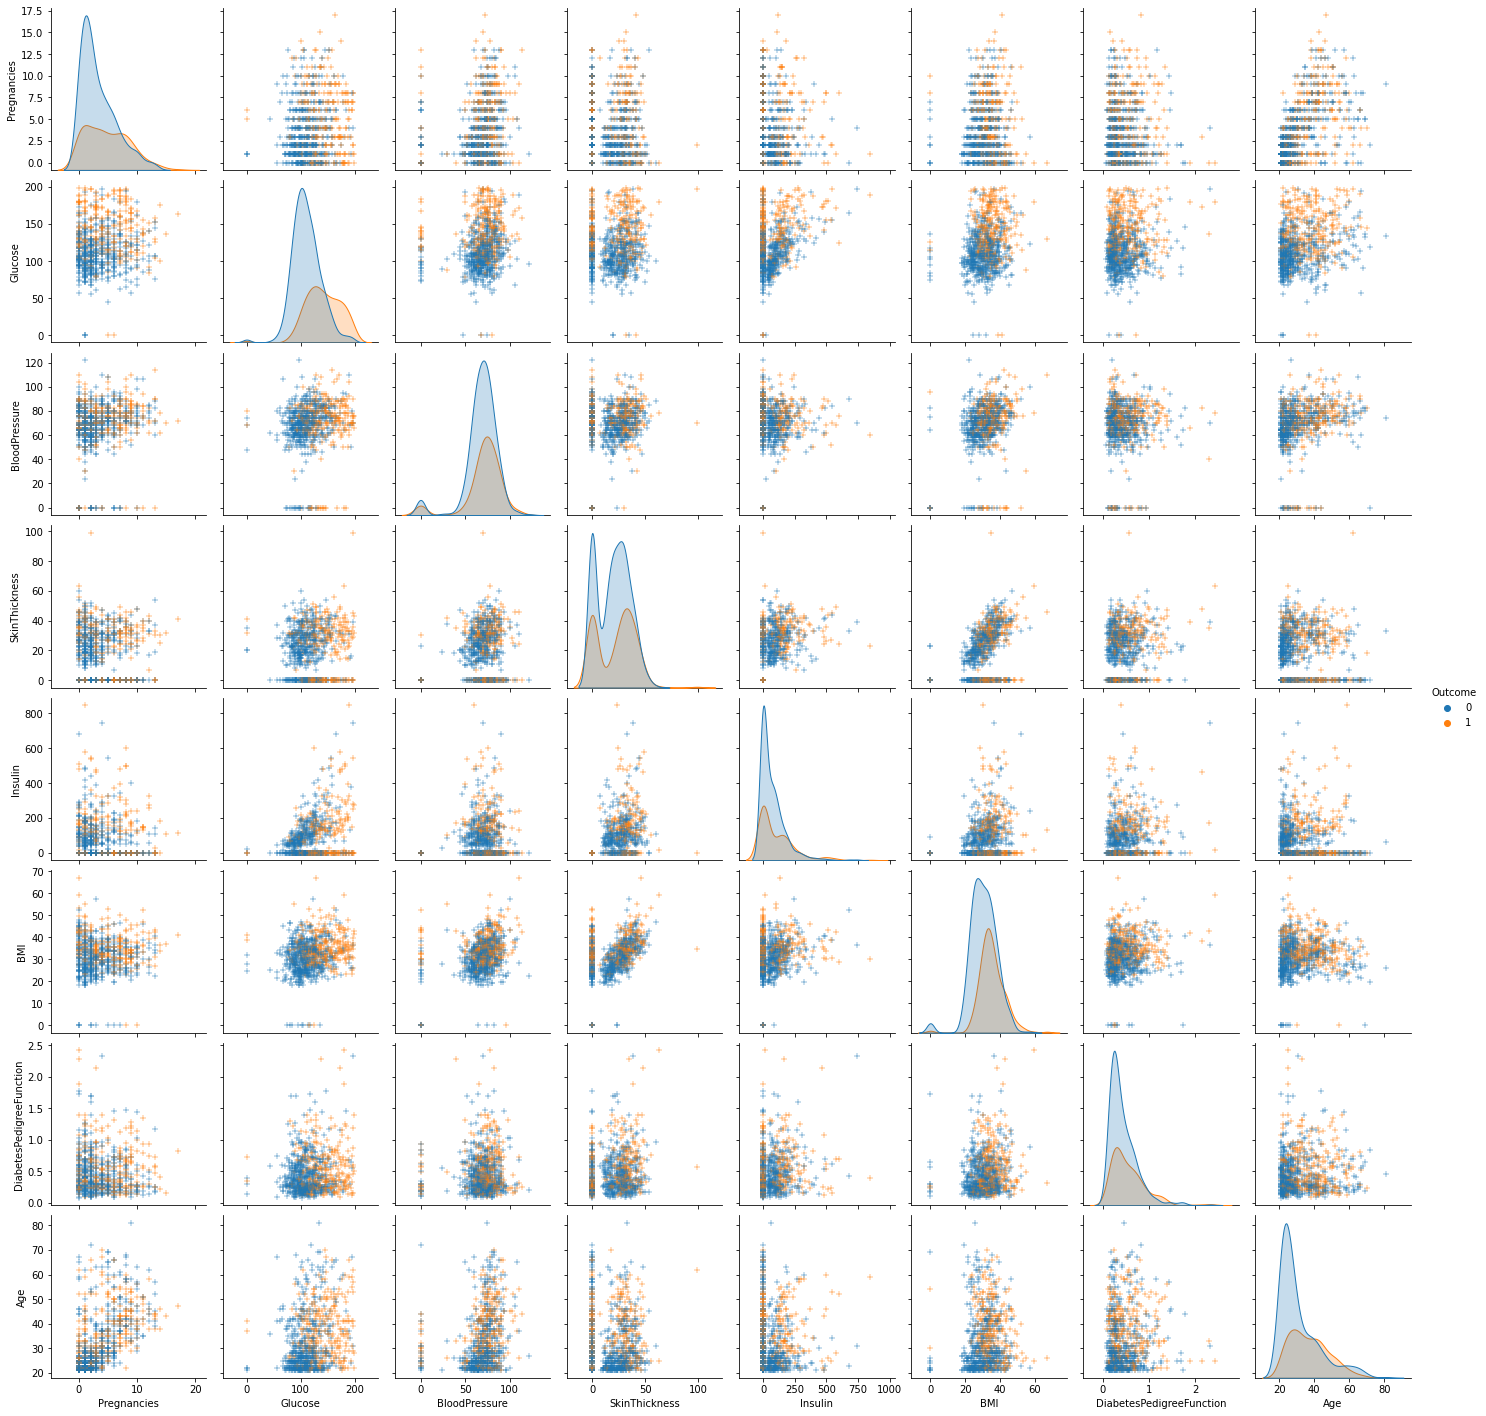

In [111]:
sn.pairplot(df, hue='Outcome',markers='+')

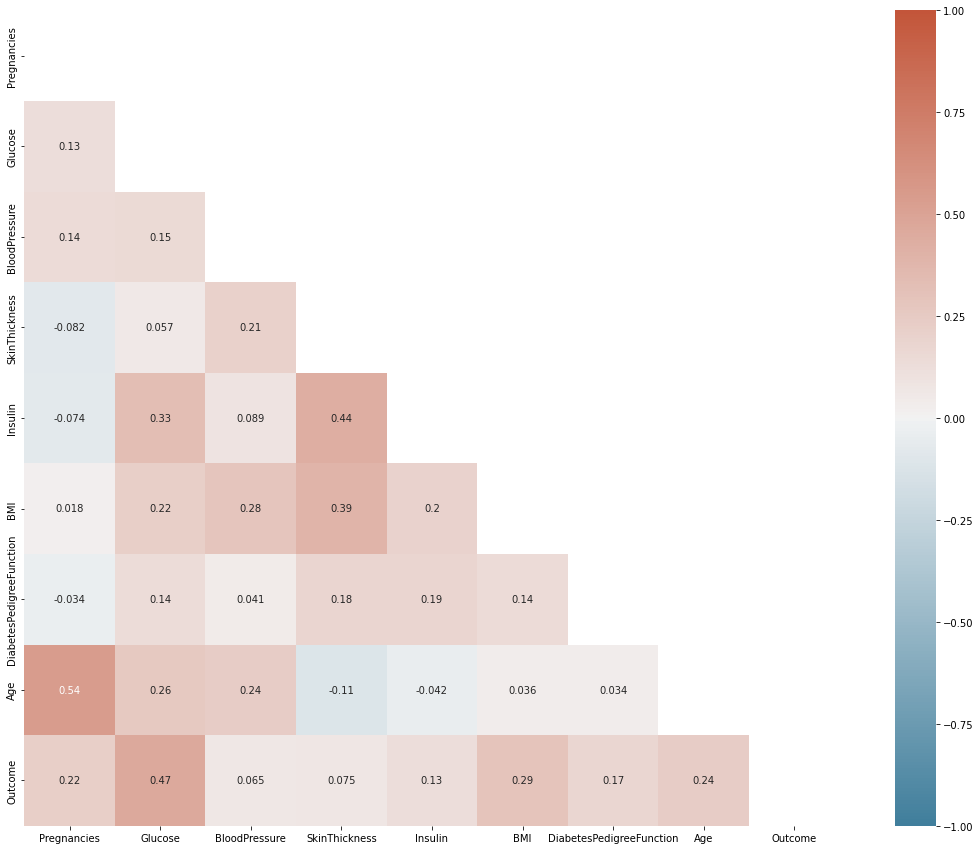

In [112]:
corrMatrix= df.corr()
mask = np.triu(np.ones_like(corrMatrix, dtype=bool))

fig, ax = plt.subplots(figsize=(20,15)) 

cmap = sn.diverging_palette(230, 20, as_cmap=True)

sn.heatmap(corrMatrix, mask= mask, cmap=cmap,  vmin=-1, vmax=1, center=0,square =True, annot= True, ax=ax)
plt.show()

In [264]:
X= df.drop(['Outcome'], axis=1)
y= df['Outcome']

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size= test_size, random_state=random_state)

In [266]:


def create_model():
    model=Sequential()
    model.add(Dense(8,input_shape=(8,), activation='relu'))
    model.add(Dense(4,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))

    
    #optimizer= Adam(learning_rate=learning_rate)

    model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [275]:
kears_estimator= KerasClassifier(build_fn=create_model,verbose=0)


In [268]:
estimator=Pipeline([('scaler', StandardScaler()),
('kears_estimator',kears_estimator)
])

In [269]:
param_grid = {
    'kears_estimator__epochs':[10,20,30],
    'kears_estimator__batch_size':[10,50,100]
}


In [270]:


grid= GridSearchCV(estimator=estimator,param_grid=param_grid,cv=cv, verbose=1, return_train_score=True, n_jobs=-1,scoring = 'accuracy')




In [271]:
grid_result = grid.fit(X_train, y_train)
best_accuracy = grid_result.best_score_
best_parameters = grid_result.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


2022-03-30 11:19:33.188734: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-30 11:19:33.603632: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-30 11:19:34.477305: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the ap

In [276]:
print(best_parameters)
print(best_accuracy )

{'kears_estimator__batch_size': 10, 'kears_estimator__epochs': 30}
0.7670798347327736
